In [162]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt

In [112]:


#get data from the Penn World Tables excel file
pwt_df = pd.read_excel('pwt100.xlsx', 'Data')
#keep only the data we need
df = pwt_df[['countrycode', 'country', 'year', 'rgdpe', 'rgdpo', 'pop', 'hc', 'ctfp', 'cwtfp']]

df = df.rename(columns={'pop': 'population'})

#df.insert(4, 'rgdpe per capita', np.nan)
df['popGrowth'] = df['population'].pct_change().mul(100).round(2)

df['rgdpepercapita'] = df['rgdpe'] / df['population']

df['rgdpepercapitagrowth'] = df['rgdpepercapita'].pct_change().mul(100).round(2)

df.to_excel("ProjectData.xlsx", sheet_name='ProjectData') 

#df

In [113]:
#get data from the Penn World Tables excel file
pwt_df = pd.read_excel('pwt100.xlsx', 'Data')
#keep only the data we need
df = pwt_df[['countrycode', 'country', 'year', 'rgdpe', 'rgdpo', 'pop', 'hc', 'ctfp', 'cwtfp']]

df['country'] = df['countrycode'] + "_" + df['country']

df = df.drop(columns=['countrycode'])
CountryCount = df['country'].nunique()
df.set_index(['country', 'year'], inplace=True)


C:\Users\Joshua\AppData\Local\Temp/ipykernel_13560/1252910043.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['country'] = df['countrycode'] + "_" + df['country']


In [114]:
#Create a list of countries and years
index = df.index
countries = []
years = []
for i in index:
    countries.append(i[0])
    years.append(i[1])
    
# remove duplicates
countries = list(set(countries)) 
years = list(set(years))

In [129]:
#Calculate %change YOY in  'rgdpe', 'rgdpo', 'hc', 'ctfp', 'cwtfp'

df['popYOY'] = np.nan
df['rgdpeYOY'] = np.nan
df['rgdpoYOY'] = np.nan
df['hcYOY'] = np.nan
df['ctfpYOY'] = np.nan
df['cwtfpYOY'] = np.nan
for i in countries:
    for y in years:
        if y != 1950 and not math.isnan(y):
            df.loc[(i,y),'popYOY'] = (df.loc[(i,y),'pop'] - df.loc[(i,y - 1),'pop']) / df.loc[(i,y - 1),'pop']
            df.loc[(i,y),'rgdpeYOY'] = (df.loc[(i,y),'rgdpe'] - df.loc[(i,y - 1),'rgdpe']) / df.loc[(i,y - 1),'rgdpe']
            df.loc[(i,y),'rgdpoYOY'] = (df.loc[(i,y),'rgdpo'] - df.loc[(i,y - 1),'rgdpo']) / df.loc[(i,y - 1),'rgdpo']
            df.loc[(i,y),'hcYOY'] = (df.loc[(i,y),'hc'] - df.loc[(i,y - 1),'hc']) / df.loc[(i,y - 1),'hc']
            df.loc[(i,y),'ctfpYOY'] = (df.loc[(i,y),'ctfp'] - df.loc[(i,y - 1),'ctfp']) / df.loc[(i,y - 1),'ctfp']
            df.loc[(i,y),'cwtfpYOY'] = (df.loc[(i,y),'cwtfp'] - df.loc[(i,y - 1),'cwtfp']) / df.loc[(i,y - 1),'cwtfp']

In [130]:
# Calculate 10 year rolling averages of % YOY variables
r = df.rolling(10,10,axis=0).mean(level='country')

df['popYOY10yr'] = r['popYOY']
df['rgdpeYOY10y'] = r['rgdpeYOY']
df['rgdpoYOY10y'] = r['rgdpoYOY']
df['hcYOY10y'] = r['hcYOY']
df['ctfpYOY10y'] = r['ctfpYOY']
df['cwtfpYOY10y'] = r['cwtfpYOY']

df.to_excel("RollingData.xlsx", sheet_name='RollingData')
#df

rgdpe         rgdpo        pop        hc      ctfp  \
country      year                                                              
ABW_Aruba    1950           NaN           NaN        NaN       NaN       NaN   
             1951           NaN           NaN        NaN       NaN       NaN   
             1952           NaN           NaN        NaN       NaN       NaN   
             1953           NaN           NaN        NaN       NaN       NaN   
             1954           NaN           NaN        NaN       NaN       NaN   
...                         ...           ...        ...       ...       ...   
ZWE_Zimbabwe 2015  40141.617188  39798.644531  13.814629  2.584653  0.386632   
             2016  41875.203125  40963.191406  14.030331  2.616257  0.385642   
             2017  44672.175781  44316.742188  14.236595  2.648248  0.402779   
             2018  44325.109375  43420.898438  14.438802  2.680630  0.382059   
             2019  42296.062500  40826.570312  14.645468  2.713408  0.351973   

                      cwtfp    popYOY  rgdpeYOY  rgdpoYOY     hcYOY   ctfpYOY  \
country      year                                                               
ABW_Aruba    1950       NaN       NaN       NaN       NaN       NaN       NaN   
             1951       NaN       NaN       NaN       NaN       NaN       NaN   
             1952       NaN       NaN       NaN       NaN       NaN       NaN   
             1953       NaN       NaN       NaN       NaN       NaN       NaN   
             1954       NaN       NaN       NaN       NaN       NaN       NaN   
...                     ...       ...       ...       ...       ...       ...   
ZWE_Zimbabwe 2015  0.447125  0.016775  0.060231  0.029057  0.013487 -0.019719   
             2016  0.423063  0.015614  0.043187  0.029261  0.012228 -0.002560   
             2017  0.432392  0.014701  0.066793  0.081867  0.012228  0.044437   
             2018  0.418766  0.014203 -0.007769 -0.020215  0.012228 -0.051442   
             2019  0.388345  0.014313 -0.045776 -0.059748  0.012228 -0.078749   

                   cwtfpYOY  popYOY10yr  rgdpeYOY10y  rgdpoYOY10y  hcYOY10y  \
country      year                                                             
ABW_Aruba    1950       NaN         NaN          NaN          NaN       NaN   
             1951       NaN         NaN          NaN          NaN       NaN   
             1952       NaN         NaN          NaN          NaN       NaN   
             1953       NaN         NaN          NaN          NaN       NaN   
             1954       NaN         NaN          NaN          NaN       NaN   
...                     ...         ...          ...          ...       ...   
ZWE_Zimbabwe 2015  0.044417    0.013543     0.092245     0.089757  0.013644   
             2016 -0.053814    0.014452     0.112977     0.116750  0.013865   
             2017  0.022050    0.015096     0.114763     0.111766  0.014086   
             2018 -0.031512    0.015508     0.139848     0.130487  0.014307   
             2019 -0.072647    0.015748     0.053515     0.045906  0.014528   

                   ctfpYOY10y  cwtfpYOY10y  
country      year                           
ABW_Aruba    1950         NaN          NaN  
             1951         NaN          NaN  
             1952         NaN          NaN  
             1953         NaN          NaN  
             1954         NaN          NaN  
...                       ...          ...  
ZWE_Zimbabwe 2015    0.084392     0.095887  
             2016    0.107585     0.104251  
             2017    0.097089     0.100221  
             2018    0.110664     0.106666  
             2019    0.024520     0.021810  

[12810 rows x 18 columns]

In [148]:
# Calculate the number of NaNs for each country to determine which countries to use in analysis
df['rowNaN']=df.isnull().sum(axis=1)
s = df.groupby('country')['rowNaN'].sum()
#df

s = s.sort_values(ascending=True)
s.to_excel("NANCounts.xlsx", sheet_name='NANCounts')

In [157]:
ind_list = ['CAN_Canada','KEN_Kenya','FRA_France','CHE_Switzerland','PHL_Philippines','JPN_Japan','COL_Colombia',
'ITA_Italy','ISR_Israel','CRI_Costa Rica','SWE_Sweden','PER_Peru','ISL_Iceland','DEU_Germany','IRL_Ireland','IND_India',
'DNK_Denmark','PRT_Portugal','ECU_Ecuador','EGY_Egypt','ESP_Spain','GTM_Guatemala','FIN_Finland','CYP_Cyprus',
'THA_Thailand','GBR_United Kingdom','BRA_Brazil','MUS_Mauritius','ZAF_South Africa','VEN_Venezuela (Bolivarian Republic of)',
'ARG_Argentina','USA_United States','URY_Uruguay','AUS_Australia','AUT_Austria','MEX_Mexico','NLD_Netherlands',
'MAR_Morocco','NOR_Norway','BEL_Belgium','LKA_Sri Lanka','BOL_Bolivia (Plurinational State of)','NZL_New Zealand',
'TTO_Trinidad and Tobago','TUR_Turkey','LUX_Luxembourg']
countries = df.loc[ind_list]
countries.to_excel("Countries.xlsx", sheet_name='Countries')

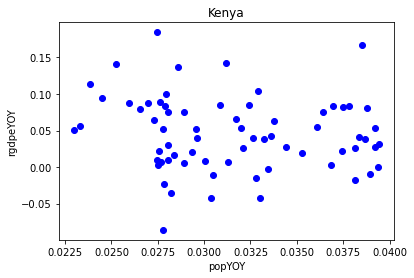

In [169]:

plt.scatter(countries.loc['KEN_Kenya','popYOY'], countries.loc['KEN_Kenya','rgdpeYOY'], c ="blue")
plt.xlabel("popYOY")
plt.ylabel("rgdpeYOY")
plt.title("Kenya")
plt.show()


C:\Users\Joshua\anaconda3\lib\site-packages\pandas\core\series.py:5258: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(result)


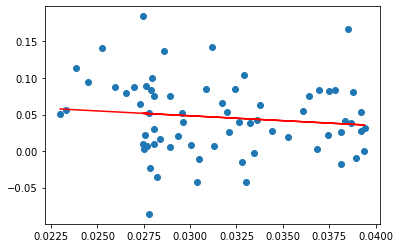

In [178]:
#define data
x = countries.loc['KEN_Kenya','popYOY']
y = countries.loc['KEN_Kenya','rgdpeYOY']
x.dropna(inplace=True)
y.dropna(inplace=True)

#find line of best fit
a, b = np.polyfit(x, y, 1)

#add points to plot
plt.scatter(x, y)

#add line of best fit to plot
plt.plot(x, a*x+b, color = 'r')
#print(x)

In [ ]:
#Create a list of countries to iterate through
index = df.index
countries = []
years = []
for i in index:
    countries.append(i[0])
    years.append(i[1])